# From 2016 to 2020, How Politics has Changed America

### Adit Gupta and Brandon Kim

The year 2016 marked a new age for America, when the presidency of President Barack Obama ended and Donald Trump was annointed into office. Just four years later, this dramatic change has occured again, as Joe Biden was just recently elected as the new President of the United States in November 2020. From President Obama to President Trump to soon-to-be president Biden, the political affiliation of the country's leader has changed from Democrat to Republican, and back to Democrat. More interesting than this change in political affiliation was the voter turnout in 2020, as it was the highest ever recorded in the United States of America's history. In addition, many authoritative figures claimed this presidential election to be the most imporant election that the country has ever had, which could be a reason why there was a such a large increase in voter turnout from 2016.

Because Joe Biden- a Democrat- won the election, this means that states in the country needed to flip in order for him to win. Of the many states that flipped, there are a few large states that played an imporant role in Biden's win as President elect. The states that my partner Adit and I chose to research were Arizona, Georgia, Michigan, Pennsylvania, and Wisconsin. When looking at these states, we first wanted to see which counties in these states had the highest percentage in relation to the state's total votes. After seeing which states were the highest, we would then dive deeper to see the distribution of votes in these counties, seeing whether or not there was a large gap between the leading party affiliation in these states, as well as to see if there was any change from 2016 to 2020. We will visualize this in a variety of ways, which you will see below.

# Data Scraping

To begin our analysis and comparison of the 2016 and 2020 election data, we will first take a look at the data for voter turnout and demographics from the 2016 election. To do this, we are going to scrape our 
election data from the link provided below. I pulled the 2016 data and created a dataframe out of it. We will be looking at the voter data to see which counties in our selected states had the largest percentage in comparison to the total state's vote count.

The 2016 election results at the county-level are scraped from results published by Townhall.com. Their formatted tables for the 2016 presidential election makes it easy for pandas to create a dataframe to capture results. This data was converted into a csv and added 
to a github repository by the user 'tonmcg', and this is where I scraped the data.

For More information on the 2016 dataset, visit [Github 2016 Election Data](https://github.com/tonmcg/US_County_Level_Election_Results_08-20/blob/master/2016_US_County_Level_Presidential_Results.csv)

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np 
import seaborn

data = pd.read_csv("2016_US_County_Level_Presidential_Results.csv")
data = data.drop(['Unnamed: 0'], axis=1) # Getting rid of extra index column
data['percent_votes'] = 0
data

votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
0       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
1       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
2       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
3       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
4       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
...         ...        ...          ...       ...       ...     ...   
3136     3233.0    12153.0      16661.0  0.194046  0.729428   8,920   
3137     7313.0     3920.0      12176.0  0.600608  0.321945   3,393   
3138     1202.0     6154.0       8053.0  0.149261  0.764187   4,952   
3139      532.0     2911.0       3715.0  0.143203  0.783580   2,379   
3140      294.0     2898.0       3334.0  0.088182  0.869226   2,604   

     per_point_diff state_abbr        county_name  combined_fips  \
0            15.17%         AK             Alaska           2013   
1            15.17%         AK             Alaska           2016   
2            15.17%         AK             Alaska           2020   
3            15.17%         AK             Alaska           2050   
4            15.17%         AK             Alaska           2060   
...             ...        ...                ...            ...   
3136         53.54%         WY  Sweetwater County          56037   
3137         27.87%         WY       Teton County          56039   
3138         61.49%         WY       Uinta County          56041   
3139         64.04%         WY    Washakie County          56043   
3140         78.10%         WY      Weston County          56045   

      percent_votes  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
3136              0  
3137              0  
3138              0  
3139              0  
3140              0  

[3141 rows x 11 columns]

After extracting the 2016 election data into a Pandas dataframe, it is now time to collect the data from 
our specific states that we would like to research.

Grouping the data into the 5 states we are interested in results in:

### 2016 Election Arizona Data

In [2]:
AZ_data = data[data['state_abbr'] == "AZ"]
AZ_data

votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
171    12196.0     5315.0      18659.0  0.653626  0.284849   6,881   
172    15291.0    25036.0      43147.0  0.354393  0.580249   9,745   
173    25308.0    16573.0      44929.0  0.563289  0.368871   8,735   
174     6746.0    13672.0      21398.0  0.315263  0.638938   6,926   
175     3301.0     8025.0      11939.0  0.276489  0.672167   4,724   
176     1092.0     1892.0       3243.0  0.336725  0.583410     800   
177     1318.0     3381.0       4931.0  0.267289  0.685662   2,063   
178   549040.0   590465.0    1201934.0  0.456797  0.491262  41,425   
179    16485.0    54656.0      74189.0  0.222203  0.736713  38,171   
180    15362.0    18165.0      35409.0  0.433845  0.513005   2,803   
181   195649.0   147019.0     360762.0  0.542322  0.407524  48,630   
182    35737.0    53857.0      93805.0  0.380971  0.574138  18,120   
183    10684.0     3650.0      14926.0  0.715798  0.244540   7,034   
184    29705.0    58862.0      92780.0  0.320166  0.634426  29,157   
185    18336.0    20586.0      40759.0  0.449864  0.505066   2,250   

    per_point_diff state_abbr        county_name  combined_fips  percent_votes  
171         36.88%         AZ      Apache County           4001              0  
172         22.59%         AZ     Cochise County           4003              0  
173         19.44%         AZ    Coconino County           4005              0  
174         32.37%         AZ        Gila County           4007              0  
175         39.57%         AZ      Graham County           4009              0  
176         24.67%         AZ    Greenlee County           4011              0  
177         41.84%         AZ      La Paz County           4012              0  
178          3.45%         AZ    Maricopa County           4013              0  
179         51.45%         AZ      Mohave County           4015              0  
180          7.92%         AZ      Navajo County           4017              0  
181         13.48%         AZ        Pima County           4019              0  
182         19.32%         AZ       Pinal County           4021              0  
183         47.13%         AZ  Santa Cruz County           4023              0  
184         31.43%         AZ     Yavapai County           4025              0  
185          5.52%         AZ        Yuma County           4027              0

### 2016 Election Georgia Data

In [3]:
GA_data = data[data['state_abbr'] == "GA"]
GA_data

votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
387     1434.0     5492.0       7003.0  0.204769  0.784235   4,058   
388      696.0     1873.0       2604.0  0.267281  0.719278   1,177   
389      607.0     3356.0       4010.0  0.151372  0.836908   2,749   
390      650.0      775.0       1440.0  0.451389  0.538194     125   
391     7965.0     7691.0      16075.0  0.495490  0.478445     274   
..         ...        ...          ...       ...       ...     ...   
541     7925.0    21514.0      30362.0  0.261017  0.708583  13,589   
542      852.0     2096.0       2973.0  0.286579  0.705012   1,244   
543     1844.0     2569.0       4470.0  0.412528  0.574720     725   
544     1893.0     2332.0       4276.0  0.442703  0.545370     439   
545     2015.0     6144.0       8266.0  0.243770  0.743286   4,129   

    per_point_diff state_abbr       county_name  combined_fips  percent_votes  
387         57.95%         GA    Appling County          13001              0  
388         45.20%         GA   Atkinson County          13003              0  
389         68.55%         GA      Bacon County          13005              0  
390          8.68%         GA      Baker County          13007              0  
391          1.70%         GA    Baldwin County          13009              0  
..             ...        ...               ...            ...            ...  
541         44.76%         GA  Whitfield County          13313              0  
542         41.84%         GA     Wilcox County          13315              0  
543         16.22%         GA     Wilkes County          13317              0  
544         10.27%         GA  Wilkinson County          13319              0  
545         49.95%         GA      Worth County          13321              0  

[159 rows x 11 columns]

### 2016 Election Michigan Data

In [4]:
MI_data = data[data['state_abbr'] == "MI"]
MI_data

votes_dem  votes_gop  total_votes   per_dem   per_gop     diff  \
1230     1732.0     4201.0       6179.0  0.280304  0.679883    2,469   
1231     1663.0     2585.0       4513.0  0.368491  0.572790      922   
1232    17932.0    33812.0      55153.0  0.325132  0.613058   15,880   
1233     4877.0     9090.0      14688.0  0.332040  0.618873    4,213   
1234     4448.0     8469.0      13572.0  0.327734  0.624005    4,021   
...         ...        ...          ...       ...       ...      ...   
1308     7493.0    17421.0      26157.0  0.286463  0.666017    9,928   
1309    13258.0    17890.0      33213.0  0.399181  0.538645    4,632   
1310   128025.0    50335.0     187201.0  0.683891  0.268882   77,690   
1311   517842.0   228908.0     775450.0  0.667795  0.295194  288,934   
1312     4436.0    10000.0      15279.0  0.290333  0.654493    5,564   

     per_point_diff state_abbr       county_name  combined_fips  percent_votes  
1230         39.96%         MI     Alcona County          26001              0  
1231         20.43%         MI      Alger County          26003              0  
1232         28.79%         MI    Allegan County          26005              0  
1233         28.68%         MI     Alpena County          26007              0  
1234         29.63%         MI     Antrim County          26009              0  
...             ...        ...               ...            ...            ...  
1308         37.96%         MI    Tuscola County          26157              0  
1309         13.95%         MI  Van Buren County          26159              0  
1310         41.50%         MI  Washtenaw County          26161              0  
1311         37.26%         MI      Wayne County          26163              0  
1312         36.42%         MI    Wexford County          26165              0  

[83 rows x 11 columns]

### 2016 Election Pennsylvania Data

In [5]:
PA_data = data[data['state_abbr'] == "PA"]
PA_data

votes_dem  votes_gop  total_votes   per_dem   per_gop     diff  \
2243    14077.0    31249.0      47138.0  0.298634  0.662926   17,172   
2244   363017.0   257488.0     643173.0  0.564416  0.400340  105,529   
2245     6849.0    22676.0      30446.0  0.224956  0.744794   15,827   
2246    30225.0    46081.0      79036.0  0.382421  0.583038   15,856   
2247     3613.0    19455.0      23504.0  0.153719  0.827731   15,842   
...         ...        ...          ...       ...       ...      ...   
2305    34436.0    58941.0      96945.0  0.355212  0.607984   24,505   
2306     6398.0    15269.0      22365.0  0.286072  0.682719    8,871   
2307    59506.0   116427.0     181740.0  0.327424  0.640624   56,921   
2308     3573.0     8375.0      12418.0  0.287727  0.674424    4,802   
2309    67428.0   126933.0     203153.0  0.331907  0.624815   59,505   

     per_point_diff state_abbr          county_name  combined_fips  \
2243         36.43%         PA         Adams County          42001   
2244         16.41%         PA     Allegheny County          42003   
2245         51.98%         PA     Armstrong County          42005   
2246         20.06%         PA        Beaver County          42007   
2247         67.40%         PA       Bedford County          42009   
...             ...        ...                  ...            ...   
2305         25.28%         PA    Washington County          42125   
2306         39.66%         PA         Wayne County          42127   
2307         31.32%         PA  Westmoreland County          42129   
2308         38.67%         PA       Wyoming County          42131   
2309         29.29%         PA          York County          42133   

      percent_votes  
2243              0  
2244              0  
2245              0  
2246              0  
2247              0  
...             ...  
2305              0  
2306              0  
2307              0  
2308              0  
2309              0  

[67 rows x 11 columns]

### 2016 Election Wisconsin Data

In [6]:
WI_data = data[data['state_abbr'] == 'WI']
WI_data

votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
2991     3780.0     5983.0      10107.0  0.373998  0.591966   2,203   
2992     4136.0     3428.0       7926.0  0.521827  0.432501     708   
2993     7881.0    13595.0      22514.0  0.350049  0.603846   5,714   
2994     4953.0     4125.0       9491.0  0.521863  0.434622     828   
2995    53358.0    67192.0     127497.0  0.418504  0.527008  13,834   
...         ...        ...          ...       ...       ...     ...   
3058    79200.0   142521.0     233273.0  0.339516  0.610962  63,321   
3059     8303.0    16013.0      25491.0  0.325723  0.628182   7,710   
3060     3802.0     7669.0      11961.0  0.317866  0.641167   3,867   
3061    37054.0    43447.0      85892.0  0.431402  0.505833   6,393   
3062    14232.0    21502.0      37712.0  0.377387  0.570163   7,270   

     per_point_diff state_abbr       county_name  combined_fips  percent_votes  
2991         21.80%         WI      Adams County          55001              0  
2992          8.93%         WI    Ashland County          55003              0  
2993         25.38%         WI     Barron County          55005              0  
2994          8.72%         WI   Bayfield County          55007              0  
2995         10.85%         WI      Brown County          55009              0  
...             ...        ...               ...            ...            ...  
3058         27.14%         WI   Waukesha County          55133              0  
3059         30.25%         WI    Waupaca County          55135              0  
3060         32.33%         WI   Waushara County          55137              0  
3061          7.44%         WI  Winnebago County          55139              0  
3062         19.28%         WI       Wood County          55141              0  

[72 rows x 11 columns]

# Adding Percentage of the Total Vote to the Dataset & Creating a Visualization

Now that we have created datasets based on the five different states of interest, it is now time to add a 'percent_votes' data column to the tables. By doing this, we will be able to clearly 
see what percent of the total vote count that the specific county had in relation to the state. To do this, we first need to find the sum of the total votes across the state, and then we simply divide 
the county's vote count by the total vote count in order to find the percentage.

After inserting this information into each state's specific dataframe, we can visualize the data by creating pie charts to show the distribution of each county's votes in relation to their respective state.

## Arizona

### 2016 Election Arizona Percent Votes Column

In [7]:
total_AZ_vote = AZ_data['total_votes'].sum()
print(total_AZ_vote)

2062810.0


In [8]:
print("The state of Arizona had a total of " + str(total_AZ_vote) + " votes during the 2016 Election.") 
print("")
print("After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county \
encompasses in relation to the state.")
print("")
print("After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the \
associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.")

The state of Arizona had a total of 2062810.0 votes during the 2016 Election.

After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county encompasses in relation to the state.

After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.


In [9]:
for index, row in AZ_data.iterrows():
    #AZ_data['percent_votes'].loc[index]
    AZ_data.loc[:, 'percent_votes'] = AZ_data.loc[:,'total_votes']/total_AZ_vote
AZ_data

/Users/brandonkim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
171    12196.0     5315.0      18659.0  0.653626  0.284849   6,881   
172    15291.0    25036.0      43147.0  0.354393  0.580249   9,745   
173    25308.0    16573.0      44929.0  0.563289  0.368871   8,735   
174     6746.0    13672.0      21398.0  0.315263  0.638938   6,926   
175     3301.0     8025.0      11939.0  0.276489  0.672167   4,724   
176     1092.0     1892.0       3243.0  0.336725  0.583410     800   
177     1318.0     3381.0       4931.0  0.267289  0.685662   2,063   
178   549040.0   590465.0    1201934.0  0.456797  0.491262  41,425   
179    16485.0    54656.0      74189.0  0.222203  0.736713  38,171   
180    15362.0    18165.0      35409.0  0.433845  0.513005   2,803   
181   195649.0   147019.0     360762.0  0.542322  0.407524  48,630   
182    35737.0    53857.0      93805.0  0.380971  0.574138  18,120   
183    10684.0     3650.0      14926.0  0.715798  0.244540   7,034   
184    29705.0    58862.0      92780.0  0.320166  0.634426  29,157   
185    18336.0    20586.0      40759.0  0.449864  0.505066   2,250   

    per_point_diff state_abbr        county_name  combined_fips  percent_votes  
171         36.88%         AZ      Apache County           4001       0.009045  
172         22.59%         AZ     Cochise County           4003       0.020917  
173         19.44%         AZ    Coconino County           4005       0.021780  
174         32.37%         AZ        Gila County           4007       0.010373  
175         39.57%         AZ      Graham County           4009       0.005788  
176         24.67%         AZ    Greenlee County           4011       0.001572  
177         41.84%         AZ      La Paz County           4012       0.002390  
178          3.45%         AZ    Maricopa County           4013       0.582668  
179         51.45%         AZ      Mohave County           4015       0.035965  
180          7.92%         AZ      Navajo County           4017       0.017165  
181         13.48%         AZ        Pima County           4019       0.174889  
182         19.32%         AZ       Pinal County           4021       0.045474  
183         47.13%         AZ  Santa Cruz County           4023       0.007236  
184         31.43%         AZ     Yavapai County           4025       0.044977  
185          5.52%         AZ        Yuma County           4027       0.019759

### 2016 Election Arizona Percent Votes Visualization

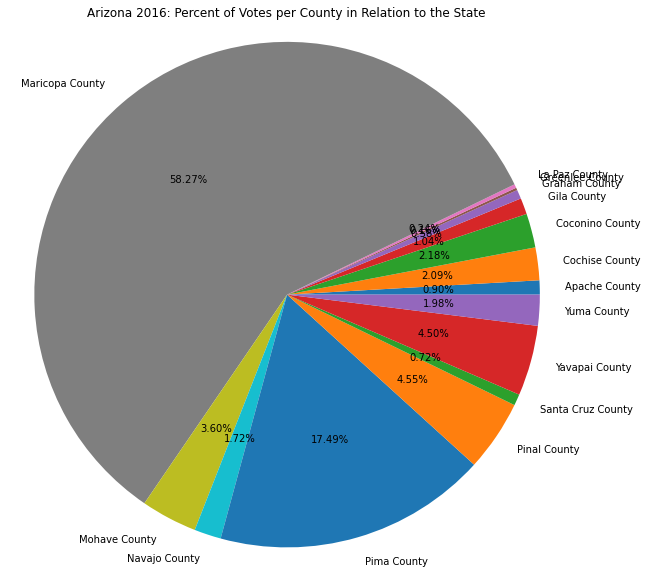

Apache County: 0.9%
Cochise County: 2.09%
Coconino County: 2.18%
Gila County: 1.04%
Graham County: 0.58%
Greenlee County: 0.16%
La Paz County: 0.24%
Maricopa County: 58.27%
Mohave County: 3.6%
Navajo County: 1.72%
Pima County: 17.49%
Pinal County: 4.55%
Santa Cruz County: 0.72%
Yavapai County: 4.5%
Yuma County: 1.98%


In [10]:
# Visualizing the Percent Voter Column 
plt.figure(figsize=(10,10))

plt.pie(AZ_data['percent_votes'], labels=AZ_data['county_name'], autopct='%1.2f%%')

plt.title('Arizona 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()

for index, row in AZ_data.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")

When looking at the 2016 Arizona counties, we can clearly see that Maricopa County had the highest proportion of votes, encompassing 58.27% of the state's total votes. Pima county had the second highest percentage but not even close, with 17.49% of the state's votes belonging to Pima County. After these two counties, not a single county in the state has more than 5% of the total votes, however Pinal County (4.55%) and Yavapai County (4.50%) are very close.")

## Georgia

### 2016 Election Georgia Percent Votes Column

In [11]:
# Total state vote, print, explanation
total_GA_vote = GA_data['total_votes'].sum()
print("The state of Georgia had a total of " + str(total_GA_vote) + " votes during the 2016 Election.") 
print("")
print("After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county \
encompasses in relation to the state.")
print("")
print("After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the \
associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.")

The state of Georgia had a total of 4029564.0 votes during the 2016 Election.

After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county encompasses in relation to the state.

After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.


In [12]:
# Create row (i.e. insert data)
for index, row in GA_data.iterrows():
    GA_data.loc[:, 'percent_votes'] = GA_data.loc[:, 'total_votes']/total_GA_vote
GA_data

/Users/brandonkim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
387     1434.0     5492.0       7003.0  0.204769  0.784235   4,058   
388      696.0     1873.0       2604.0  0.267281  0.719278   1,177   
389      607.0     3356.0       4010.0  0.151372  0.836908   2,749   
390      650.0      775.0       1440.0  0.451389  0.538194     125   
391     7965.0     7691.0      16075.0  0.495490  0.478445     274   
..         ...        ...          ...       ...       ...     ...   
541     7925.0    21514.0      30362.0  0.261017  0.708583  13,589   
542      852.0     2096.0       2973.0  0.286579  0.705012   1,244   
543     1844.0     2569.0       4470.0  0.412528  0.574720     725   
544     1893.0     2332.0       4276.0  0.442703  0.545370     439   
545     2015.0     6144.0       8266.0  0.243770  0.743286   4,129   

    per_point_diff state_abbr       county_name  combined_fips  percent_votes  
387         57.95%         GA    Appling County          13001       0.001738  
388         45.20%         GA   Atkinson County          13003       0.000646  
389         68.55%         GA      Bacon County          13005       0.000995  
390          8.68%         GA      Baker County          13007       0.000357  
391          1.70%         GA    Baldwin County          13009       0.003989  
..             ...        ...               ...            ...            ...  
541         44.76%         GA  Whitfield County          13313       0.007535  
542         41.84%         GA     Wilcox County          13315       0.000738  
543         16.22%         GA     Wilkes County          13317       0.001109  
544         10.27%         GA  Wilkinson County          13319       0.001061  
545         49.95%         GA      Worth County          13321       0.002051  

[159 rows x 11 columns]

### 2016 Election Georgia Percent Votes Visualization

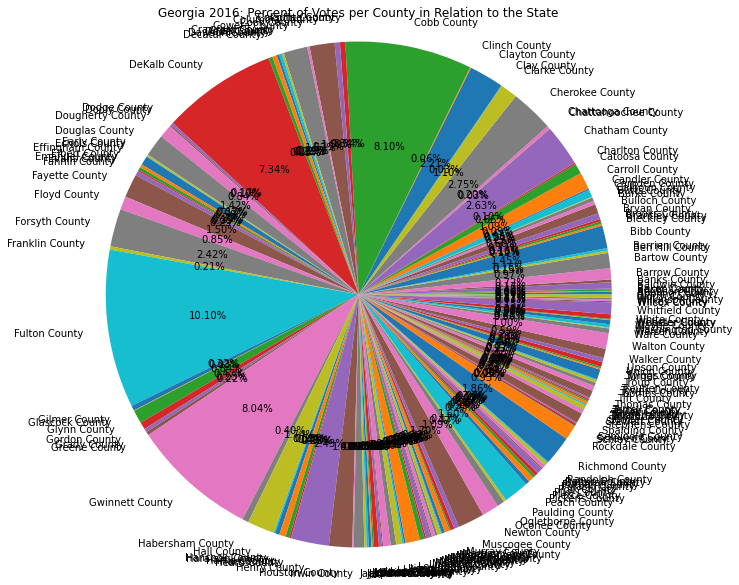

Appling County: 0.17%
Atkinson County: 0.06%
Bacon County: 0.1%
Baker County: 0.04%
Baldwin County: 0.4%
Banks County: 0.17%
Barrow County: 0.72%
Bartow County: 0.97%
Ben Hill County: 0.15%
Berrien County: 0.16%
Bibb County: 1.45%
Bleckley County: 0.12%
Brantley County: 0.16%
Brooks County: 0.16%
Bryan County: 0.37%
Bulloch County: 0.6%
Burke County: 0.23%
Butts County: 0.24%
Calhoun County: 0.05%
Camden County: 0.47%
Candler County: 0.09%
Carroll County: 1.09%
Catoosa County: 0.66%
Charlton County: 0.1%
Chatham County: 2.63%
Chattahoochee County: 0.03%
Chattooga County: 0.2%
Cherokee County: 2.75%
Clarke County: 1.1%
Clay County: 0.03%
Clayton County: 2.21%
Clinch County: 0.06%
Cobb County: 8.1%
Coffee County: 0.34%
Colquitt County: 0.34%
Columbia County: 1.59%
Cook County: 0.15%
Coweta County: 1.52%
Crawford County: 0.13%
Crisp County: 0.19%
Dade County: 0.15%
Dawson County: 0.29%
Decatur County: 0.25%
DeKalb County: 7.34%
Dodge County: 0.17%
Dooly County: 0.1%
Dougherty County: 0.84

In [13]:
# Creating plot and printing percent
plt.figure(figsize=(10,10))
plt.pie(GA_data['percent_votes'], labels=GA_data['county_name'], autopct='%1.2f%%')
plt.title('Georgia 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()
for index, row in GA_data.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")

Looking at Georgia's 2016 election pie chart for county vote percentage, we can clearly see four counties that stick out as holding a higher percentage than the rest of the counties in the state. Fulton County (10.10%), Cobb County (8.10%), Gwinnett County (8.04%) & DeKalb County (7.34%) were the four largest counties in the state. Otherwise, most of counties were miniscule values in relation to the state as a whole. One thing to note is that because of the mass amount of counties in the state, the distribution is a little more flattened in comparison to Arizona. If there were not as many counties with such small values, the distribution four these four large counties would go up.

## Michigan

### 2016 Election Michigan Percent Votes Column

In [14]:
# Total state vote, print, explanation
total_MI_vote = MI_data['total_votes'].sum()
print("The state of Michigan had a total of " + str(total_MI_vote) + " votes during the 2016 Election.") 
print("")
print("After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county \
encompasses in relation to the state.")
print("")
print("After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the \
associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.")

The state of Michigan had a total of 4790917.0 votes during the 2016 Election.

After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county encompasses in relation to the state.

After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.


In [15]:
# Create row (i.e. insert data)
for index, row in MI_data.iterrows():
    MI_data.loc[:, 'percent_votes'] = MI_data.loc[:,'total_votes']/total_MI_vote
MI_data

/Users/brandonkim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


votes_dem  votes_gop  total_votes   per_dem   per_gop     diff  \
1230     1732.0     4201.0       6179.0  0.280304  0.679883    2,469   
1231     1663.0     2585.0       4513.0  0.368491  0.572790      922   
1232    17932.0    33812.0      55153.0  0.325132  0.613058   15,880   
1233     4877.0     9090.0      14688.0  0.332040  0.618873    4,213   
1234     4448.0     8469.0      13572.0  0.327734  0.624005    4,021   
...         ...        ...          ...       ...       ...      ...   
1308     7493.0    17421.0      26157.0  0.286463  0.666017    9,928   
1309    13258.0    17890.0      33213.0  0.399181  0.538645    4,632   
1310   128025.0    50335.0     187201.0  0.683891  0.268882   77,690   
1311   517842.0   228908.0     775450.0  0.667795  0.295194  288,934   
1312     4436.0    10000.0      15279.0  0.290333  0.654493    5,564   

     per_point_diff state_abbr       county_name  combined_fips  percent_votes  
1230         39.96%         MI     Alcona County          26001       0.001290  
1231         20.43%         MI      Alger County          26003       0.000942  
1232         28.79%         MI    Allegan County          26005       0.011512  
1233         28.68%         MI     Alpena County          26007       0.003066  
1234         29.63%         MI     Antrim County          26009       0.002833  
...             ...        ...               ...            ...            ...  
1308         37.96%         MI    Tuscola County          26157       0.005460  
1309         13.95%         MI  Van Buren County          26159       0.006932  
1310         41.50%         MI  Washtenaw County          26161       0.039074  
1311         37.26%         MI      Wayne County          26163       0.161858  
1312         36.42%         MI    Wexford County          26165       0.003189  

[83 rows x 11 columns]

### 2016 Election Michigan Percent Votes Visualization

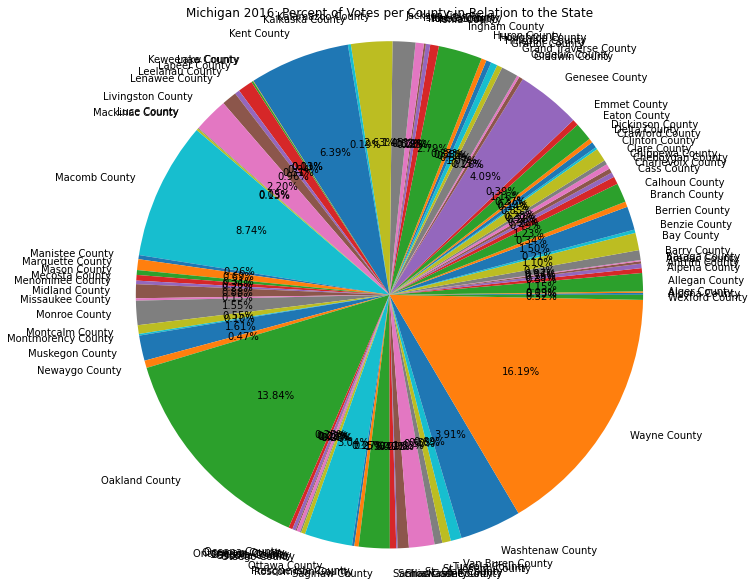

Alcona County: 0.13%
Alger County: 0.09%
Allegan County: 1.15%
Alpena County: 0.31%
Antrim County: 0.28%
Arenac County: 0.16%
Baraga County: 0.07%
Barry County: 0.63%
Bay County: 1.1%
Benzie County: 0.21%
Berrien County: 1.5%
Branch County: 0.34%
Calhoun County: 1.23%
Cass County: 0.49%
Charlevoix County: 0.3%
Cheboygan County: 0.28%
Chippewa County: 0.32%
Clare County: 0.28%
Clinton County: 0.85%
Crawford County: 0.14%
Delta County: 0.39%
Dickinson County: 0.27%
Eaton County: 1.16%
Emmet County: 0.39%
Genesee County: 4.09%
Gladwin County: 0.26%
Gogebic County: 0.15%
Grand Traverse County: 1.07%
Gratiot County: 0.34%
Hillsdale County: 0.41%
Houghton County: 0.33%
Huron County: 0.33%
Ingham County: 2.79%
Ionia County: 0.55%
Iosco County: 0.28%
Iron County: 0.12%
Isabella County: 0.53%
Jackson County: 1.45%
Kalamazoo County: 2.63%
Kalkaska County: 0.19%
Kent County: 6.39%
Keweenaw County: 0.03%
Lake County: 0.11%
Lapeer County: 0.94%
Leelanau County: 0.31%
Lenawee County: 0.96%
Livingsto

In [16]:
# Creating plot and printing percent
plt.figure(figsize=(10,10))
plt.pie(MI_data['percent_votes'], labels=MI_data['county_name'], autopct='%1.2f%%')
plt.title('Michigan 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()
for index, row in MI_data.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")

When observing the 2016 Michigan county vote distribution, similar to the Georgia data there are four main counties that catch the eye immediately when looking at the pie chart. Wayne County (16.19%), Oakland County (13.84%), Macomb County (8.74%), and Kent County (6.39%) can be seen right away. There are a few counties that have around 4% of the vote distribution (Washtenaw and Genesee County), but that percent is small in comparison to the 'big four' counties in Michigan.")

## Pennsylvania

### 2016 Election Pennsylvania Percent Votes Column

In [17]:
# Total state vote, print, explanation
total_PA_vote = PA_data['total_votes'].sum()
print("The state of Pennsylvania had a total of " + str(total_PA_vote) + " votes during the 2016 Election.") 
print("")
print("After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county \
encompasses in relation to the state.")
print("")
print("After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the \
associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.")

The state of Pennsylvania had a total of 5970107.0 votes during the 2016 Election.

After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county encompasses in relation to the state.

After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.


In [18]:
# Create row (i.e. insert data)
for index, row in PA_data.iterrows():
    PA_data.loc[:, 'percent_votes'] = PA_data.loc[:,'total_votes']/total_PA_vote
PA_data

/Users/brandonkim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


votes_dem  votes_gop  total_votes   per_dem   per_gop     diff  \
2243    14077.0    31249.0      47138.0  0.298634  0.662926   17,172   
2244   363017.0   257488.0     643173.0  0.564416  0.400340  105,529   
2245     6849.0    22676.0      30446.0  0.224956  0.744794   15,827   
2246    30225.0    46081.0      79036.0  0.382421  0.583038   15,856   
2247     3613.0    19455.0      23504.0  0.153719  0.827731   15,842   
...         ...        ...          ...       ...       ...      ...   
2305    34436.0    58941.0      96945.0  0.355212  0.607984   24,505   
2306     6398.0    15269.0      22365.0  0.286072  0.682719    8,871   
2307    59506.0   116427.0     181740.0  0.327424  0.640624   56,921   
2308     3573.0     8375.0      12418.0  0.287727  0.674424    4,802   
2309    67428.0   126933.0     203153.0  0.331907  0.624815   59,505   

     per_point_diff state_abbr          county_name  combined_fips  \
2243         36.43%         PA         Adams County          42001   
2244         16.41%         PA     Allegheny County          42003   
2245         51.98%         PA     Armstrong County          42005   
2246         20.06%         PA        Beaver County          42007   
2247         67.40%         PA       Bedford County          42009   
...             ...        ...                  ...            ...   
2305         25.28%         PA    Washington County          42125   
2306         39.66%         PA         Wayne County          42127   
2307         31.32%         PA  Westmoreland County          42129   
2308         38.67%         PA       Wyoming County          42131   
2309         29.29%         PA          York County          42133   

      percent_votes  
2243       0.007896  
2244       0.107732  
2245       0.005100  
2246       0.013239  
2247       0.003937  
...             ...  
2305       0.016238  
2306       0.003746  
2307       0.030442  
2308       0.002080  
2309       0.034028  

[67 rows x 11 columns]

### 2016 Election Pennsylvania Percent Votes Visualization

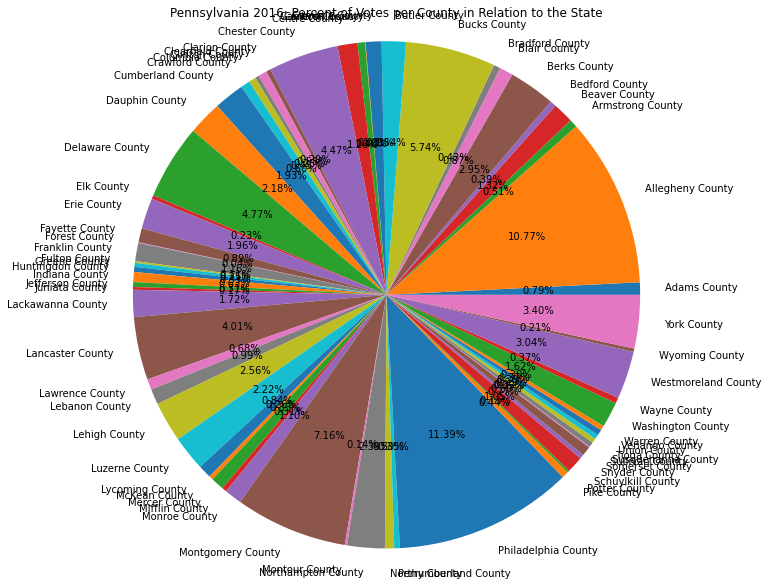

Adams County: 0.79%
Allegheny County: 10.77%
Armstrong County: 0.51%
Beaver County: 1.32%
Bedford County: 0.39%
Berks County: 2.95%
Blair County: 0.87%
Bradford County: 0.43%
Bucks County: 5.74%
Butler County: 1.54%
Cambria County: 1.01%
Cameron County: 0.03%
Carbon County: 0.48%
Centre County: 1.26%
Chester County: 4.47%
Clarion County: 0.29%
Clearfield County: 0.55%
Clinton County: 0.25%
Columbia County: 0.45%
Crawford County: 0.6%
Cumberland County: 1.93%
Dauphin County: 2.18%
Delaware County: 4.77%
Elk County: 0.23%
Erie County: 1.96%
Fayette County: 0.89%
Forest County: 0.04%
Franklin County: 1.16%
Fulton County: 0.11%
Greene County: 0.25%
Huntingdon County: 0.33%
Indiana County: 0.63%
Jefferson County: 0.31%
Juniata County: 0.17%
Lackawanna County: 1.72%
Lancaster County: 4.01%
Lawrence County: 0.68%
Lebanon County: 0.99%
Lehigh County: 2.56%
Luzerne County: 2.22%
Lycoming County: 0.84%
McKean County: 0.26%
Mercer County: 0.83%
Mifflin County: 0.31%
Monroe County: 1.1%
Montgomery

In [19]:
# Creating plot and printing percent 
plt.figure(figsize=(10,10))
plt.pie(PA_data['percent_votes'], labels=PA_data['county_name'], autopct='%1.2f%%')
plt.title('Pennsylvania 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()
for index, row in PA_data.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")

Taking a look at the 2016 Pennsylvania election piechart, the top four counties for vote percentage in relation to the state were: Philadelphia County (11.39%), Allegheny County (10.77%), Montgomery County (7.16%), and Bucks County (5.72%). There were many counties in Pennsylvania that had around 4% of the total vote percentage, including Delaware County, Lancaster County, and York County. When viewing the pie chart one could say that the population distribution across the state are more balanced than that of Georgia and Michigan.

## Wisconsin

### 2016 Election Wisconsin Percent Votes Column

In [20]:
# Total state vote, print, explanation
total_WI_vote = WI_data['total_votes'].sum()
print("The state of Wisconsin had a total of " + str(total_WI_vote) + " votes during the 2016 Election.") 
print("")
print("After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county \
encompasses in relation to the state.")
print("")
print("After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the \
associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.")

The state of Wisconsin had a total of 2937326.0 votes during the 2016 Election.

After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county encompasses in relation to the state.

After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.


In [21]:
# Create row (i.e. insert data)
for index, row in WI_data.iterrows():
    WI_data.loc[:, 'percent_votes'] = WI_data.loc[:,'total_votes']/total_WI_vote
WI_data

/Users/brandonkim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
2991     3780.0     5983.0      10107.0  0.373998  0.591966   2,203   
2992     4136.0     3428.0       7926.0  0.521827  0.432501     708   
2993     7881.0    13595.0      22514.0  0.350049  0.603846   5,714   
2994     4953.0     4125.0       9491.0  0.521863  0.434622     828   
2995    53358.0    67192.0     127497.0  0.418504  0.527008  13,834   
...         ...        ...          ...       ...       ...     ...   
3058    79200.0   142521.0     233273.0  0.339516  0.610962  63,321   
3059     8303.0    16013.0      25491.0  0.325723  0.628182   7,710   
3060     3802.0     7669.0      11961.0  0.317866  0.641167   3,867   
3061    37054.0    43447.0      85892.0  0.431402  0.505833   6,393   
3062    14232.0    21502.0      37712.0  0.377387  0.570163   7,270   

     per_point_diff state_abbr       county_name  combined_fips  percent_votes  
2991         21.80%         WI      Adams County          55001       0.003441  
2992          8.93%         WI    Ashland County          55003       0.002698  
2993         25.38%         WI     Barron County          55005       0.007665  
2994          8.72%         WI   Bayfield County          55007       0.003231  
2995         10.85%         WI      Brown County          55009       0.043406  
...             ...        ...               ...            ...            ...  
3058         27.14%         WI   Waukesha County          55133       0.079417  
3059         30.25%         WI    Waupaca County          55135       0.008678  
3060         32.33%         WI   Waushara County          55137       0.004072  
3061          7.44%         WI  Winnebago County          55139       0.029242  
3062         19.28%         WI       Wood County          55141       0.012839  

[72 rows x 11 columns]

### 2016 Election Wisconsin Percent Votes Visualization

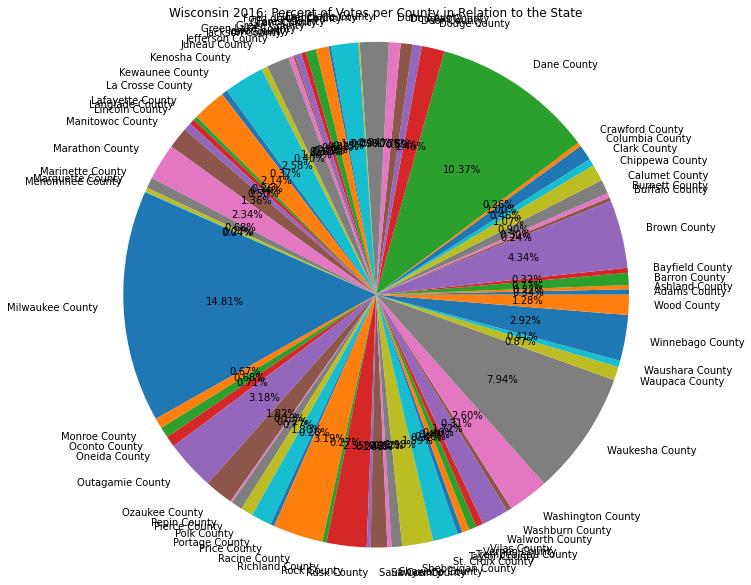

Adams County: 0.34%
Ashland County: 0.27%
Barron County: 0.77%
Bayfield County: 0.32%
Brown County: 4.34%
Buffalo County: 0.24%
Burnett County: 0.3%
Calumet County: 0.9%
Chippewa County: 1.07%
Clark County: 0.46%
Columbia County: 1.0%
Crawford County: 0.26%
Dane County: 10.37%
Dodge County: 1.46%
Door County: 0.59%
Douglas County: 0.76%
Dunn County: 0.75%
Eau Claire County: 1.84%
Florence County: 0.09%
Fond du Lac County: 1.74%
Forest County: 0.15%
Grant County: 0.82%
Green County: 0.64%
Green Lake County: 0.32%
Iowa County: 0.41%
Iron County: 0.12%
Jackson County: 0.31%
Jefferson County: 1.44%
Juneau County: 0.4%
Kenosha County: 2.58%
Kewaunee County: 0.37%
La Crosse County: 2.14%
Lafayette County: 0.26%
Langlade County: 0.34%
Lincoln County: 0.5%
Manitowoc County: 1.36%
Marathon County: 2.34%
Marinette County: 0.68%
Marquette County: 0.27%
Menominee County: 0.04%
Milwaukee County: 14.81%
Monroe County: 0.67%
Oconto County: 0.68%
Oneida County: 0.71%
Outagamie County: 3.18%
Ozaukee Co

In [22]:
# Creating plot and printing percent
plt.figure(figsize=(10,10))
plt.pie(WI_data['percent_votes'], labels=WI_data['county_name'], autopct='%1.2f%%')
plt.title('Wisconsin 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()
for index, row in WI_data.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")

Looking at Wisconsin's 2016 election voter percentage data, we can see that there are only three main counties that jump out to the viewer when observing the pie chart. These three counties are Milwaukee County (14.81%), Dane County (10.37%), and Waukseha County (7.94%). Other than this, many of the other counties are around 4% of the state's total vote distribution or less. When looking at this visualization, we can make the conclusion that these three counties hold the highest population of voters, as they contribute the most to the state's total vote count.

# Scraping Data and Collecting County Population

After finding the percentage of the votes in relation to the state for each county and visualizing the pie chart, we are now interested in looking at the distribution of our data in relation to the total population of the state. We will be pulling Census data for the five states we are interested in. The data is a collection of information from the years 2010-2019, but we will drop the other years that we do not need, because we are specifically paying attention to the 2016 election.

Now, we will scrape the csv's and pull create dataframes for each state for the total census data per county.

## Arizona Population Data 2016

In [23]:
arizonaPop = pd.read_csv('../changeInPop/arizona.csv')
arizonaPop.rename(columns = {'Unnamed: 0': 'County/State'}, inplace=True)
arizonaPop = arizonaPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019'], axis=1)
arizonaPop

County/State     Census Estimates Base       2016
0                      Arizona  6,392,017      6,392,288  6,941,072
1       Apache County, Arizona     71,518         71,517     71,381
2      Cochise County, Arizona    131,346        131,359    125,686
3     Coconino County, Arizona    134,421        134,426    140,407
4         Gila County, Arizona     53,597         53,592     53,356
5       Graham County, Arizona     37,220         37,212     37,807
6     Greenlee County, Arizona      8,437          8,444      9,643
7       La Paz County, Arizona     20,489         20,489     20,648
8     Maricopa County, Arizona  3,817,117      3,817,365  4,256,143
9       Mohave County, Arizona    200,186        200,182    205,412
10      Navajo County, Arizona    107,449        107,488    108,467
11        Pima County, Arizona    980,263        980,263  1,016,707
12       Pinal County, Arizona    375,770        375,764    417,193
13  Santa Cruz County, Arizona     47,420         47,420     46,400
14     Yavapai County, Arizona    211,033        211,017    224,575
15        Yuma County, Arizona    195,751        195,750    207,247

## Georgia Population Data 2016

In [24]:
georgiaPop = pd.read_csv('../changeInPop/georgia.csv')
georgiaPop.rename(columns={'Unnamed: 0': 'County/State'}, inplace=True)
georgiaPop = georgiaPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019'], axis=1)
georgiaPop

County/State     Census Estimates Base        2016
0                      Georgia  9,687,653      9,688,729  10,301,890
1      Appling County, Georgia     18,236         18,238      18,428
2     Atkinson County, Georgia      8,375          8,380       8,244
3        Bacon County, Georgia     11,096         11,097      11,275
4        Baker County, Georgia      3,451          3,447       3,183
..                         ...        ...            ...         ...
155  Whitfield County, Georgia    102,599        102,605     104,406
156     Wilcox County, Georgia      9,255          9,256       8,841
157     Wilkes County, Georgia     10,593         10,593       9,809
158  Wilkinson County, Georgia      9,563          9,570       9,020
159      Worth County, Georgia     21,679         21,667      20,703

[160 rows x 4 columns]

## Michigan Population Data 2016

In [25]:
michiganPop = pd.read_csv('../changeInPop/michigan.csv')
michiganPop.rename(columns={'Unnamed: 0': 'County/State'}, inplace=True)
michiganPop = michiganPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019'], axis=1)
michiganPop

County/State     Census Estimates Base       2016
0                     Michigan  9,883,640      9,884,116  9,950,571
1      Alcona County, Michigan     10,942         10,943     10,360
2       Alger County, Michigan      9,601          9,601      9,129
3     Allegan County, Michigan    111,408        111,400    114,979
4      Alpena County, Michigan     29,598         29,594     28,663
..                         ...        ...            ...        ...
79    Tuscola County, Michigan     55,729         55,722     53,276
80  Van Buren County, Michigan     76,258         76,269     75,267
81  Washtenaw County, Michigan    344,791        345,163    366,135
82      Wayne County, Michigan  1,820,584      1,820,473  1,760,612
83    Wexford County, Michigan     32,735         32,735     33,081

[84 rows x 4 columns]

## Pennsylvania Population Data 2016

In [26]:
pennsylvaniaPop = pd.read_csv('../changeInPop/pennsylvania.csv')
pennsylvaniaPop.rename(columns={'Unnamed: 0': 'County/State'}, inplace=True)
pennsylvaniaPop = pennsylvaniaPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019'], axis=1)
pennsylvaniaPop

County/State      Census Estimates Base        2016
0                        Pennsylvania  12,702,379     12,702,868  12,782,275
1          Adams County, Pennsylvania     101,407        101,428     101,911
2      Allegheny County, Pennsylvania   1,223,348      1,223,303   1,226,426
3      Armstrong County, Pennsylvania      68,941         69,059      66,397
4         Beaver County, Pennsylvania     170,539        170,531     166,758
..                                ...         ...            ...         ...
63    Washington County, Pennsylvania     207,820        207,849     207,386
64         Wayne County, Pennsylvania      52,822         52,873      51,339
65  Westmoreland County, Pennsylvania     365,169        365,071     354,665
66       Wyoming County, Pennsylvania      28,276         28,283      27,546
67          York County, Pennsylvania     434,972        435,015     443,693

[68 rows x 4 columns]

## Wisconsin Population Data 2016

In [27]:
wisconsinPop = pd.read_csv('../changeInPop/wisconsin.csv')
wisconsinPop.rename(columns={'Unnamed: 0': 'County/State'}, inplace=True)
wisconsinPop = wisconsinPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019'], axis=1)
wisconsinPop

County/State     Census Estimates Base       2016
0                     Wisconsin  5,686,986      5,687,285  5,772,628
1       Adams County, Wisconsin     20,875         20,867     19,982
2     Ashland County, Wisconsin     16,157         16,157     15,633
3      Barron County, Wisconsin     45,870         45,873     45,242
4    Bayfield County, Wisconsin     15,014         15,008     14,923
..                          ...        ...            ...        ...
68   Waukesha County, Wisconsin    389,891        389,946    398,521
69    Waupaca County, Wisconsin     52,410         52,410     51,306
70   Waushara County, Wisconsin     24,496         24,509     24,103
71  Winnebago County, Wisconsin    166,994        167,000    169,629
72       Wood County, Wisconsin     74,749         74,750     73,219

[73 rows x 4 columns]

# Visualization of each state & its counties for voter turnout in 2016

We would now like to visualize the voter turnout in 2016. To do this, we will use the Census data that was extracted above, and see the percentage of people living in each county that voted. We will take the 'total_votes' from the 2016 election data table, and divide that by the total population of that county in order to receive our final value.

We first need to use Regex and other techniques in order to merge the two tables together in order to receive the information that we need overall.

## Arizona Voter Turnout 2016

In [28]:
# Editing the 'arizonaPop' table so that the county's are standalone
import re 

arizonaPop['county_name'] = arizonaPop['County/State'].str.extract(r'([a-zA-Z]*\s*[a-zA-Z]*\s*County)')
arizonaPop = arizonaPop.drop(columns=['County/State'], axis=1)

After using regex in order to extract just the county names for each entry, with the first entry in the table being the state totals itself (that is why it comes up as NaN), we then rearrange the rows in order to make the dataframe look organized, with the county names at the front of the table.

After rearranging the data, we can now go about merging our two tables together in order to create a visualization of the voter turnout.

In [29]:
# Moving the Columns around in order for the County Names to be shown first
cols = arizonaPop.columns.tolist()
cols = cols[-1:]  + cols[:-1]
arizonaPop = arizonaPop[cols]
arizonaPop

county_name     Census Estimates Base       2016
0                 NaN  6,392,017      6,392,288  6,941,072
1       Apache County     71,518         71,517     71,381
2      Cochise County    131,346        131,359    125,686
3     Coconino County    134,421        134,426    140,407
4         Gila County     53,597         53,592     53,356
5       Graham County     37,220         37,212     37,807
6     Greenlee County      8,437          8,444      9,643
7       La Paz County     20,489         20,489     20,648
8     Maricopa County  3,817,117      3,817,365  4,256,143
9       Mohave County    200,186        200,182    205,412
10      Navajo County    107,449        107,488    108,467
11        Pima County    980,263        980,263  1,016,707
12       Pinal County    375,770        375,764    417,193
13  Santa Cruz County     47,420         47,420     46,400
14     Yavapai County    211,033        211,017    224,575
15        Yuma County    195,751        195,750    207,247

In [34]:
# Creating merged table and dropping appropriate columns to make data look good
merged_arizona_data = pd.merge(left=AZ_data, right=arizonaPop, on='county_name')

no_need = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 
           'diff', 'per_point_diff', 'combined_fips', 'percent_votes',
          'Census', 'Estimates Base']

merged_arizona_data = merged_arizona_data.drop(columns=no_need, axis=1)
merged_arizona_data.rename(columns={'2016': '2016 County Population', 'state_abbr': 'State Abbrev.', 
                                   'county_name': 'County Name', 'total_votes': '2016 Vote Count'}, inplace=True)

cols = merged_arizona_data.columns.tolist()
cols = cols[-3:] + cols[:-3]
merged_arizona_data = merged_arizona_data[cols]

merged_arizona_data

State Abbrev.        County Name 2016 County Population  2016 Vote Count
0             AZ      Apache County                 71,381          18659.0
1             AZ     Cochise County                125,686          43147.0
2             AZ    Coconino County                140,407          44929.0
3             AZ        Gila County                 53,356          21398.0
4             AZ      Graham County                 37,807          11939.0
5             AZ    Greenlee County                  9,643           3243.0
6             AZ      La Paz County                 20,648           4931.0
7             AZ    Maricopa County              4,256,143        1201934.0
8             AZ      Mohave County                205,412          74189.0
9             AZ      Navajo County                108,467          35409.0
10            AZ        Pima County              1,016,707         360762.0
11            AZ       Pinal County                417,193          93805.0
12            AZ  Santa Cruz County                 46,400          14926.0
13            AZ     Yavapai County                224,575          92780.0
14            AZ        Yuma County                207,247          40759.0

In [31]:
# Calculation of voter turnout percentage and bar graph visualization

# State Map Visualization

Visit [County Choropleth Maps In Python](https://plotly.com/python/county-choropleth/) to learn more.

Using the link above, we will now create maps for each of these five states that we are interested in.

## Arizona State Visualization 

In [32]:
import plotly.figure_factory as ff

df_sample = pd.read_csv('minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'Arizona']

values = AZ_data['total_votes'].tolist()
fips = df_sample_r['FIPS'].tolist()

# fig = ff.create_choropleth(fips=fips, values=values)
# fig.layout.template = None
# fig.show()

In [33]:
import plotly.express as px

fig = px.choropleth(locations=["AZ", "GA", "MI", "PA", "WI"], locationmode="USA-states", color=[1, 2, 3, 4, 5], scope="usa")
fig.show()